In [1]:
from __future__ import print_function, division

from sklearn import datasets
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils.graph import graph_shortest_path
from sklearn.decomposition import KernelPCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

In [47]:
def mds_embedding(D, n_components=2):
    D2 = D**2
    # construct centering matrix: J = I - 1/n*O
    # where O is a n,n-matrix of ones
    J = np.eye(n_samples) - 1/n_samples * np.dot(np.ones((n_samples,1)), np.ones((1,n_samples)))

    # Apply double centering to distance matrix
    B = -1/2 * np.dot(np.dot(J, D2), J)

    # find singular value decomposition of centered distance matrix
    U, s, V = np.linalg.svd(B)
    
    # extract two first singular values and vectors
    L = np.diag(s[:n_components]**(1/2))
    E = U[:, :n_components]

    # project to 2-dimensional space
    Y = np.zeros(shape=(n_samples, n_components))
    for k in range(n_components):
        for i in range(n_samples):
            Y[i, k] = np.sqrt(s[k])*U[i, k]
            
    return Y


def isomap_embedding(X, n_components=2,  n_neighbors=10, metric='euclidean'):
    n_samples = X.shape[0]
    
    # construct neighborhood graph
    neigh = NearestNeighbors(n_neighbors=n_neighbors, metric=metric).fit(X)
    kng = kneighbors_graph(neigh, n_neighbors=n_neighbors,
                           mode='distance', metric=metric)
    # compute pairwise graph distances
    D_graph = graph_shortest_path(kng, method='auto', directed=False)    
    
    return mds_embedding(D_graph, n_components=n_components)

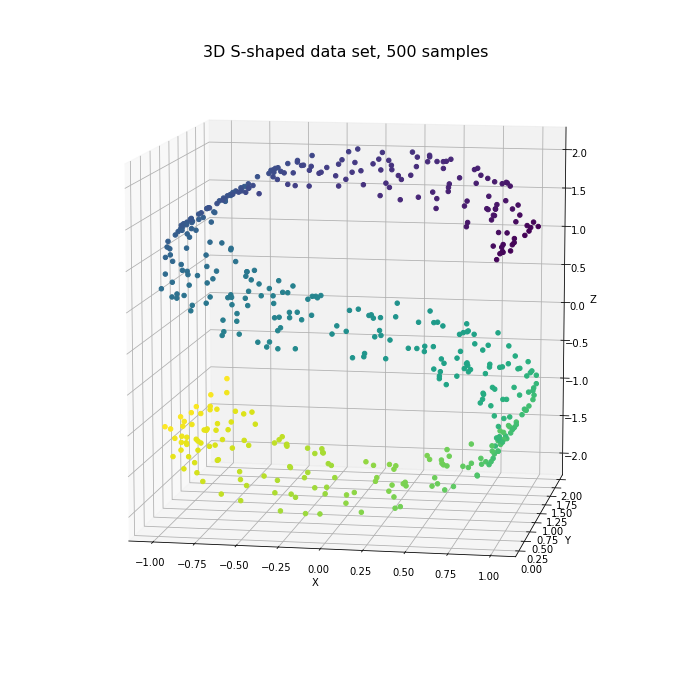

In [48]:
n_samples = 500
X, t = datasets.make_s_curve(n_samples=n_samples, random_state=0)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = X.transpose()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(xs, ys, zs, c=t, alpha=1)

ax.view_init(10, 280)
ax.set_title('3D S-shaped data set, {} samples'.format(n_samples), fontsize=16)
plt.show()

Stress: 9421.42501238


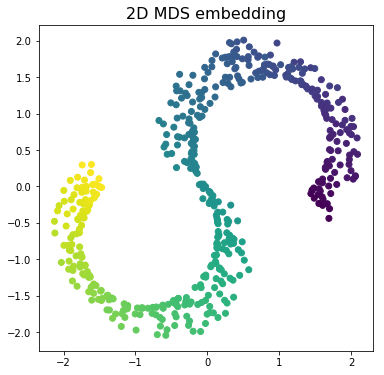

In [49]:
mds = MDS(n_components=2, random_state=0)
Y = mds.fit_transform(X)
print('Stress:', mds.stress_)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(*Y.transpose(), c=t)
ax.set_title('2D MDS embedding', fontsize=16)

plt.show()

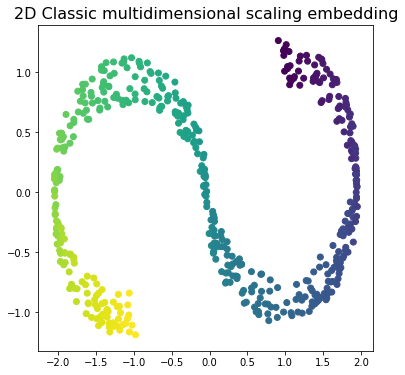

In [50]:
D = euclidean_distances(X)

Y = mds_embedding(D)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(*Y.transpose(), c=t)
ax.set_title('2D Classic multidimensional scaling embedding', fontsize=16)

plt.show()

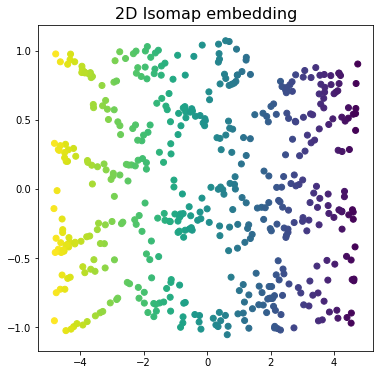

In [26]:
Y_1 = isomap_embedding(X)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(*Y_1.transpose(), c=t)
ax.set_title('2D Isomap embedding', fontsize=16)

plt.show()

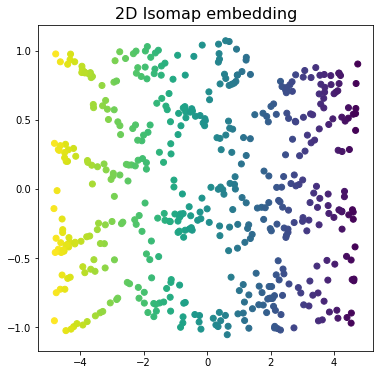

In [40]:
np.random.seed(9)

Y_2 = Isomap(n_components=2, n_neighbors=10).fit_transform(X)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(*Y_2.transpose(), c=t)
ax.set_title('2D Isomap embedding', fontsize=16)

plt.show()

In [41]:
np.linalg.norm(Y_1 - Y_2)

6.5912613010352957e-14

In [42]:
abs(Y_1 - Y_2).max()

4.1411318818518339e-14

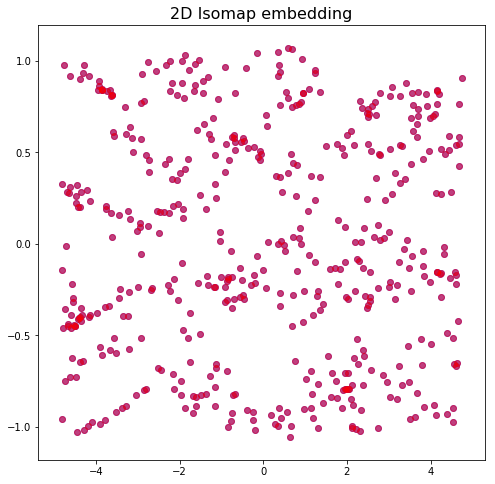

In [72]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(*Y_1.transpose(), c='b', alpha=0.5)
ax.scatter(*Y_2.transpose(), c='r', alpha=0.5)
ax.set_title('2D Isomap embedding', fontsize=16)

plt.show()

In [73]:
import pickle

with open('data/mnist.pkl', 'r') as f:
    digits = pickle.load(f)
    
    
y = digits[0][1][digits[0][1] == 2]
X = digits[0][0][digits[0][1] == 2]

img_height, img_width = 28, 28

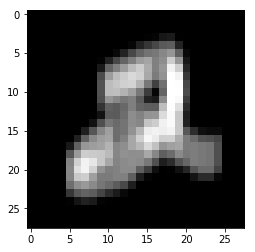

In [111]:
from scipy import signal
import pywt
from scipy import ndimage
from scipy.misc import face

#im = face(gray=True)
im = X[0].reshape((28, 28))

weights = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])


#filtered = ndimage.filters.convolve(im, weights)
coeffs = pywt.dwt2(data, 'haar')
cA, (cH, cV, cD) = coeffs

plt.imshow(filtered, cmap=plt.cm.Greys_r)
plt.show()